The notebooks includes the process of feature selection

In [27]:
import os
import matplotlib.pyplot as plt
import geopandas
import pandas as pd
import seaborn as sn
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Setting the directory

In [28]:
os.chdir(r'C:\Users\aageen17\Desktop\Variables')

Reading the .csv file with predictor variables and target variable

In [29]:
data=pd.read_csv('sample_points.csv')

Plotting the correlation matrix to check the linear relation between our predictors

In [32]:
df = data.iloc[:, :-1]
#dropping categorical variables
df= df.drop(columns=['soil', 'geomorphology', 'underground', 'prequaternary'])
#generating correlation matrix
corr = df.corr(method='pearson')

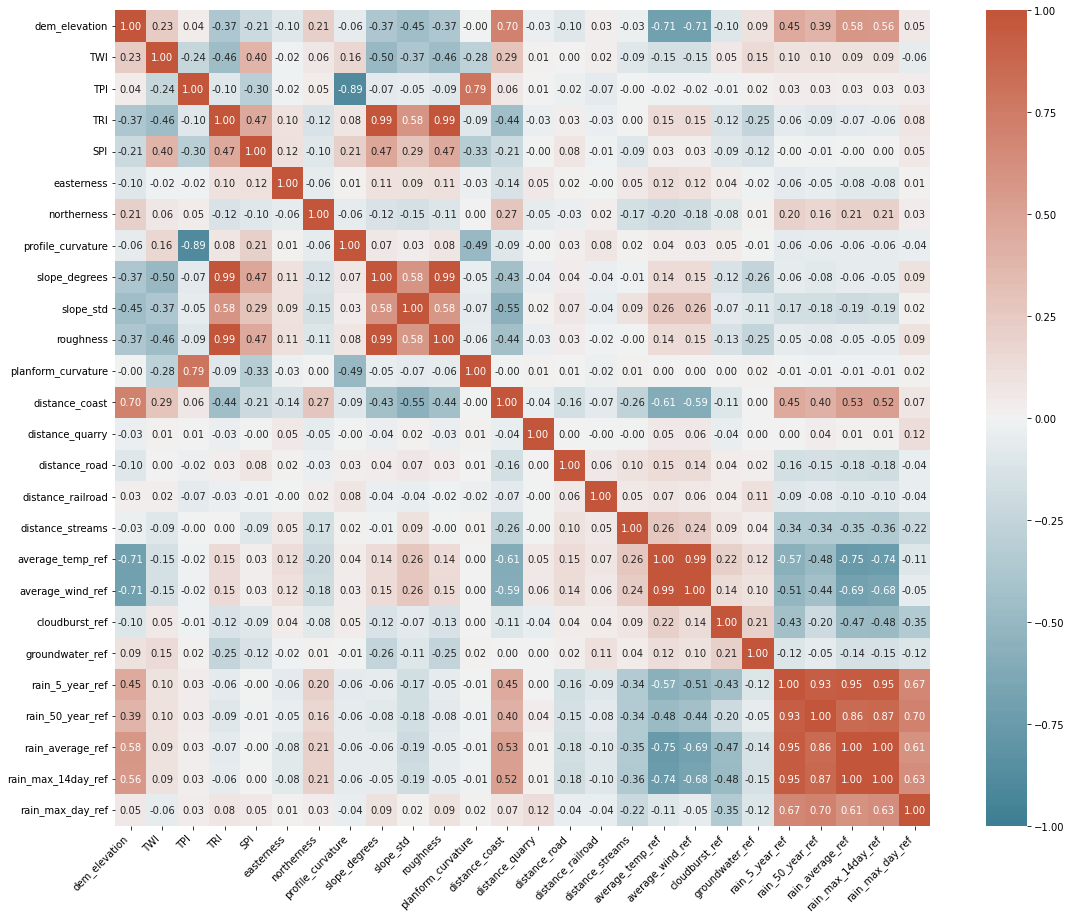

In [33]:
 # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

ax = sn.heatmap(
    corr, 
    annot=True,
    fmt='.2f',
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(220, 20, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.savefig('correlation.png', bbox_inches='tight', dpi=600)
plt.show()

We can see, that there are several variables that are highly correlated, especially the climate data. Let's remove some of them

In [6]:
# The below code shows all columns that are more correlated that a given threshold
# It's just selecting from the correlation matrix. 
def test_correlation(df, cutoff=0.75):
    abs_corr = df.corr().abs()
    upper_tri = abs_corr.where(np.triu(np.ones(abs_corr.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > cutoff)]
    return to_drop

# Print the columns to drop
test_correlation(df)

['profile_curvature',
 'slope_degrees',
 'roughness',
 'planform_curvature',
 'average_wind_ref',
 'rain_50_year_ref',
 'rain_average_ref',
 'rain_max_14day_ref']

Drop highly correlated predictors


In [7]:
data_selected = data.drop(columns=['profile_curvature','slope_degrees', 'roughness', 'planform_curvature', 'average_wind_ref', 'rain_max_14day_ref', 'rain_5_year_ref', 'rain_50_year_ref'])

Showing the first 5 rows of the data to see that the columns are removed

In [8]:
data_selected.head()

dem_elevation       TWI       TPI       TRI       SPI  easterness  \
0      15.706318  4.440497  0.126874  0.173688 -1.667908    0.196570   
1      15.232349  3.427183  0.048178  0.395249  0.731700    0.575379   
2      17.030214  3.888671 -0.000931  0.361396  1.081142    0.634705   
3      15.583941  4.675134 -0.030232  0.183543  0.294679   -0.788825   
4      17.499943  8.491714  0.150789  0.410609  5.817518    0.268115   

   northerness  slope_std  distance_coast  distance_quarry  ...  \
0    -0.980490   4.752529           115.0            250.0  ...   
1    -0.817887   3.343206            52.0            250.0  ...   
2    -0.772755   0.880331            80.0            250.0  ...   
3    -0.614618   3.459515           120.0            250.0  ...   
4    -0.963387   2.392220            89.0            250.0  ...   

   average_temp_ref  cloudburst_ref  groundwater_ref  rain_average_ref  \
0          8.462731        0.332363        -8.441628          2.006541   
1          8.462731        0.332363        -1.949753          2.006541   
2          8.462731        0.332363        -1.608266          2.006541   
3          8.455420        0.329927        -7.234321          2.017731   
4          8.463237        0.328551        -0.485680          2.021318   

   rain_max_day_ref  soil  geomorphology  underground  prequaternary  class  
0         33.681606  15.0            7.0          3.0            6.0      1  
1         33.681606  15.0            7.0          3.0            6.0      1  
2         33.681606  15.0            7.0          3.0            6.0      1  
3         33.668327  15.0            7.0          3.0            6.0      1  
4         33.706505  15.0            7.0          3.0            6.0      1  

[5 rows x 23 columns]

Plotting a new correlation matrix without highly correlated features

In [9]:
def correlation_matrix(df):
    corr = df.corr(method='pearson')
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sn.diverging_palette(230, 20, as_cmap=True)

    sn.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

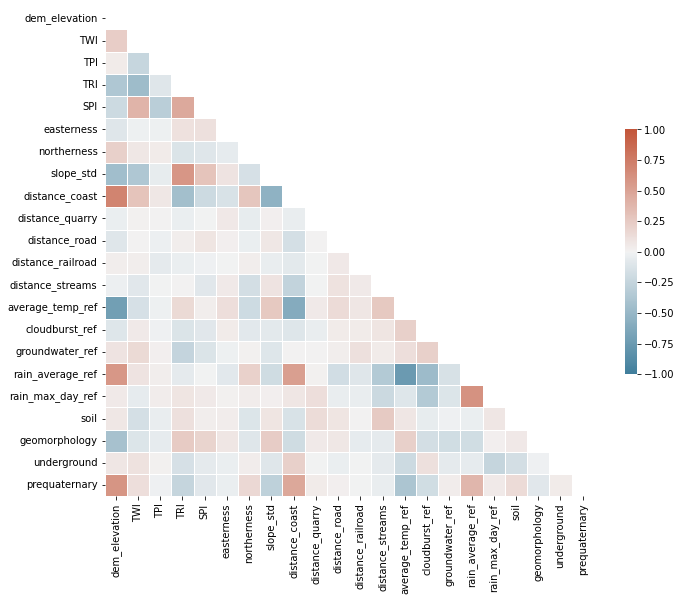

In [10]:
  # Print the correlation matrix
correlation_matrix(data_selected.iloc[:,0:-1])

Plotting the distributions of the selected features

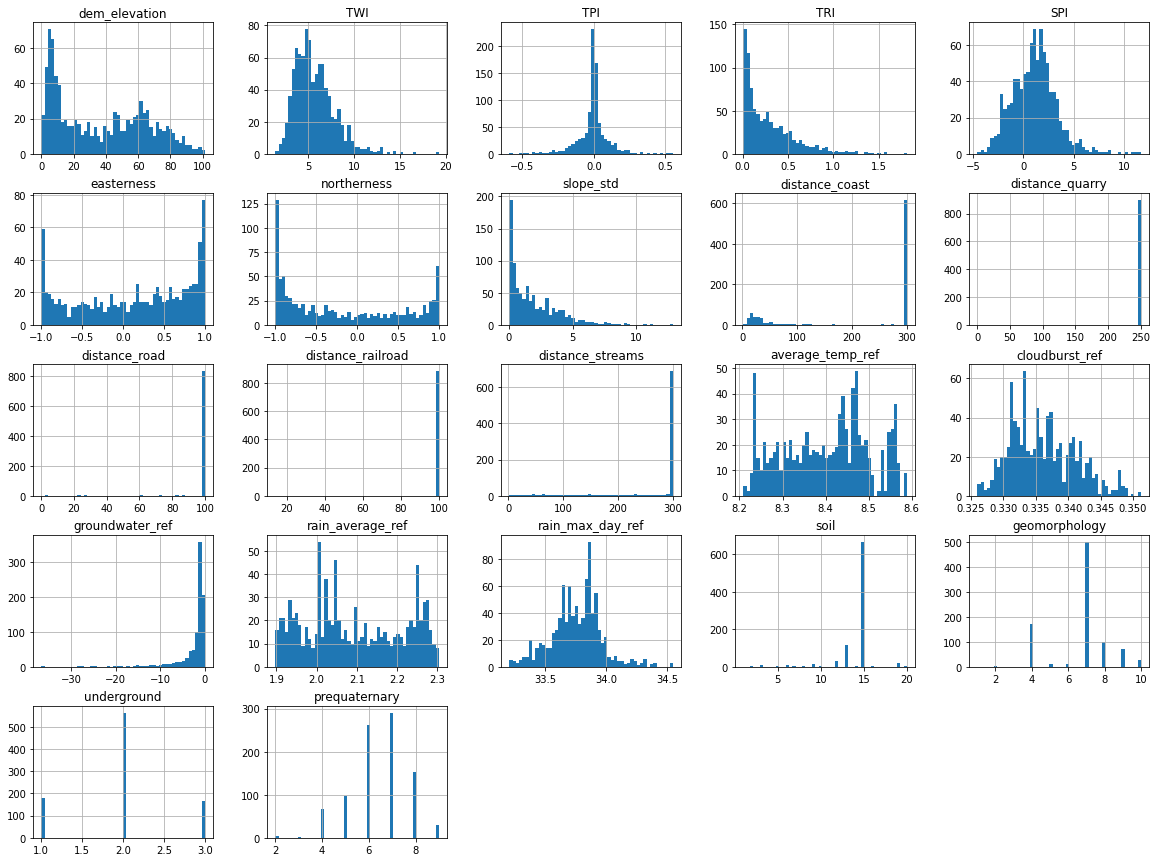

In [17]:
data_selected.iloc[:,0:-1].hist(bins=50, figsize=(20,15))
plt.show()

And their pairwise scatter plot


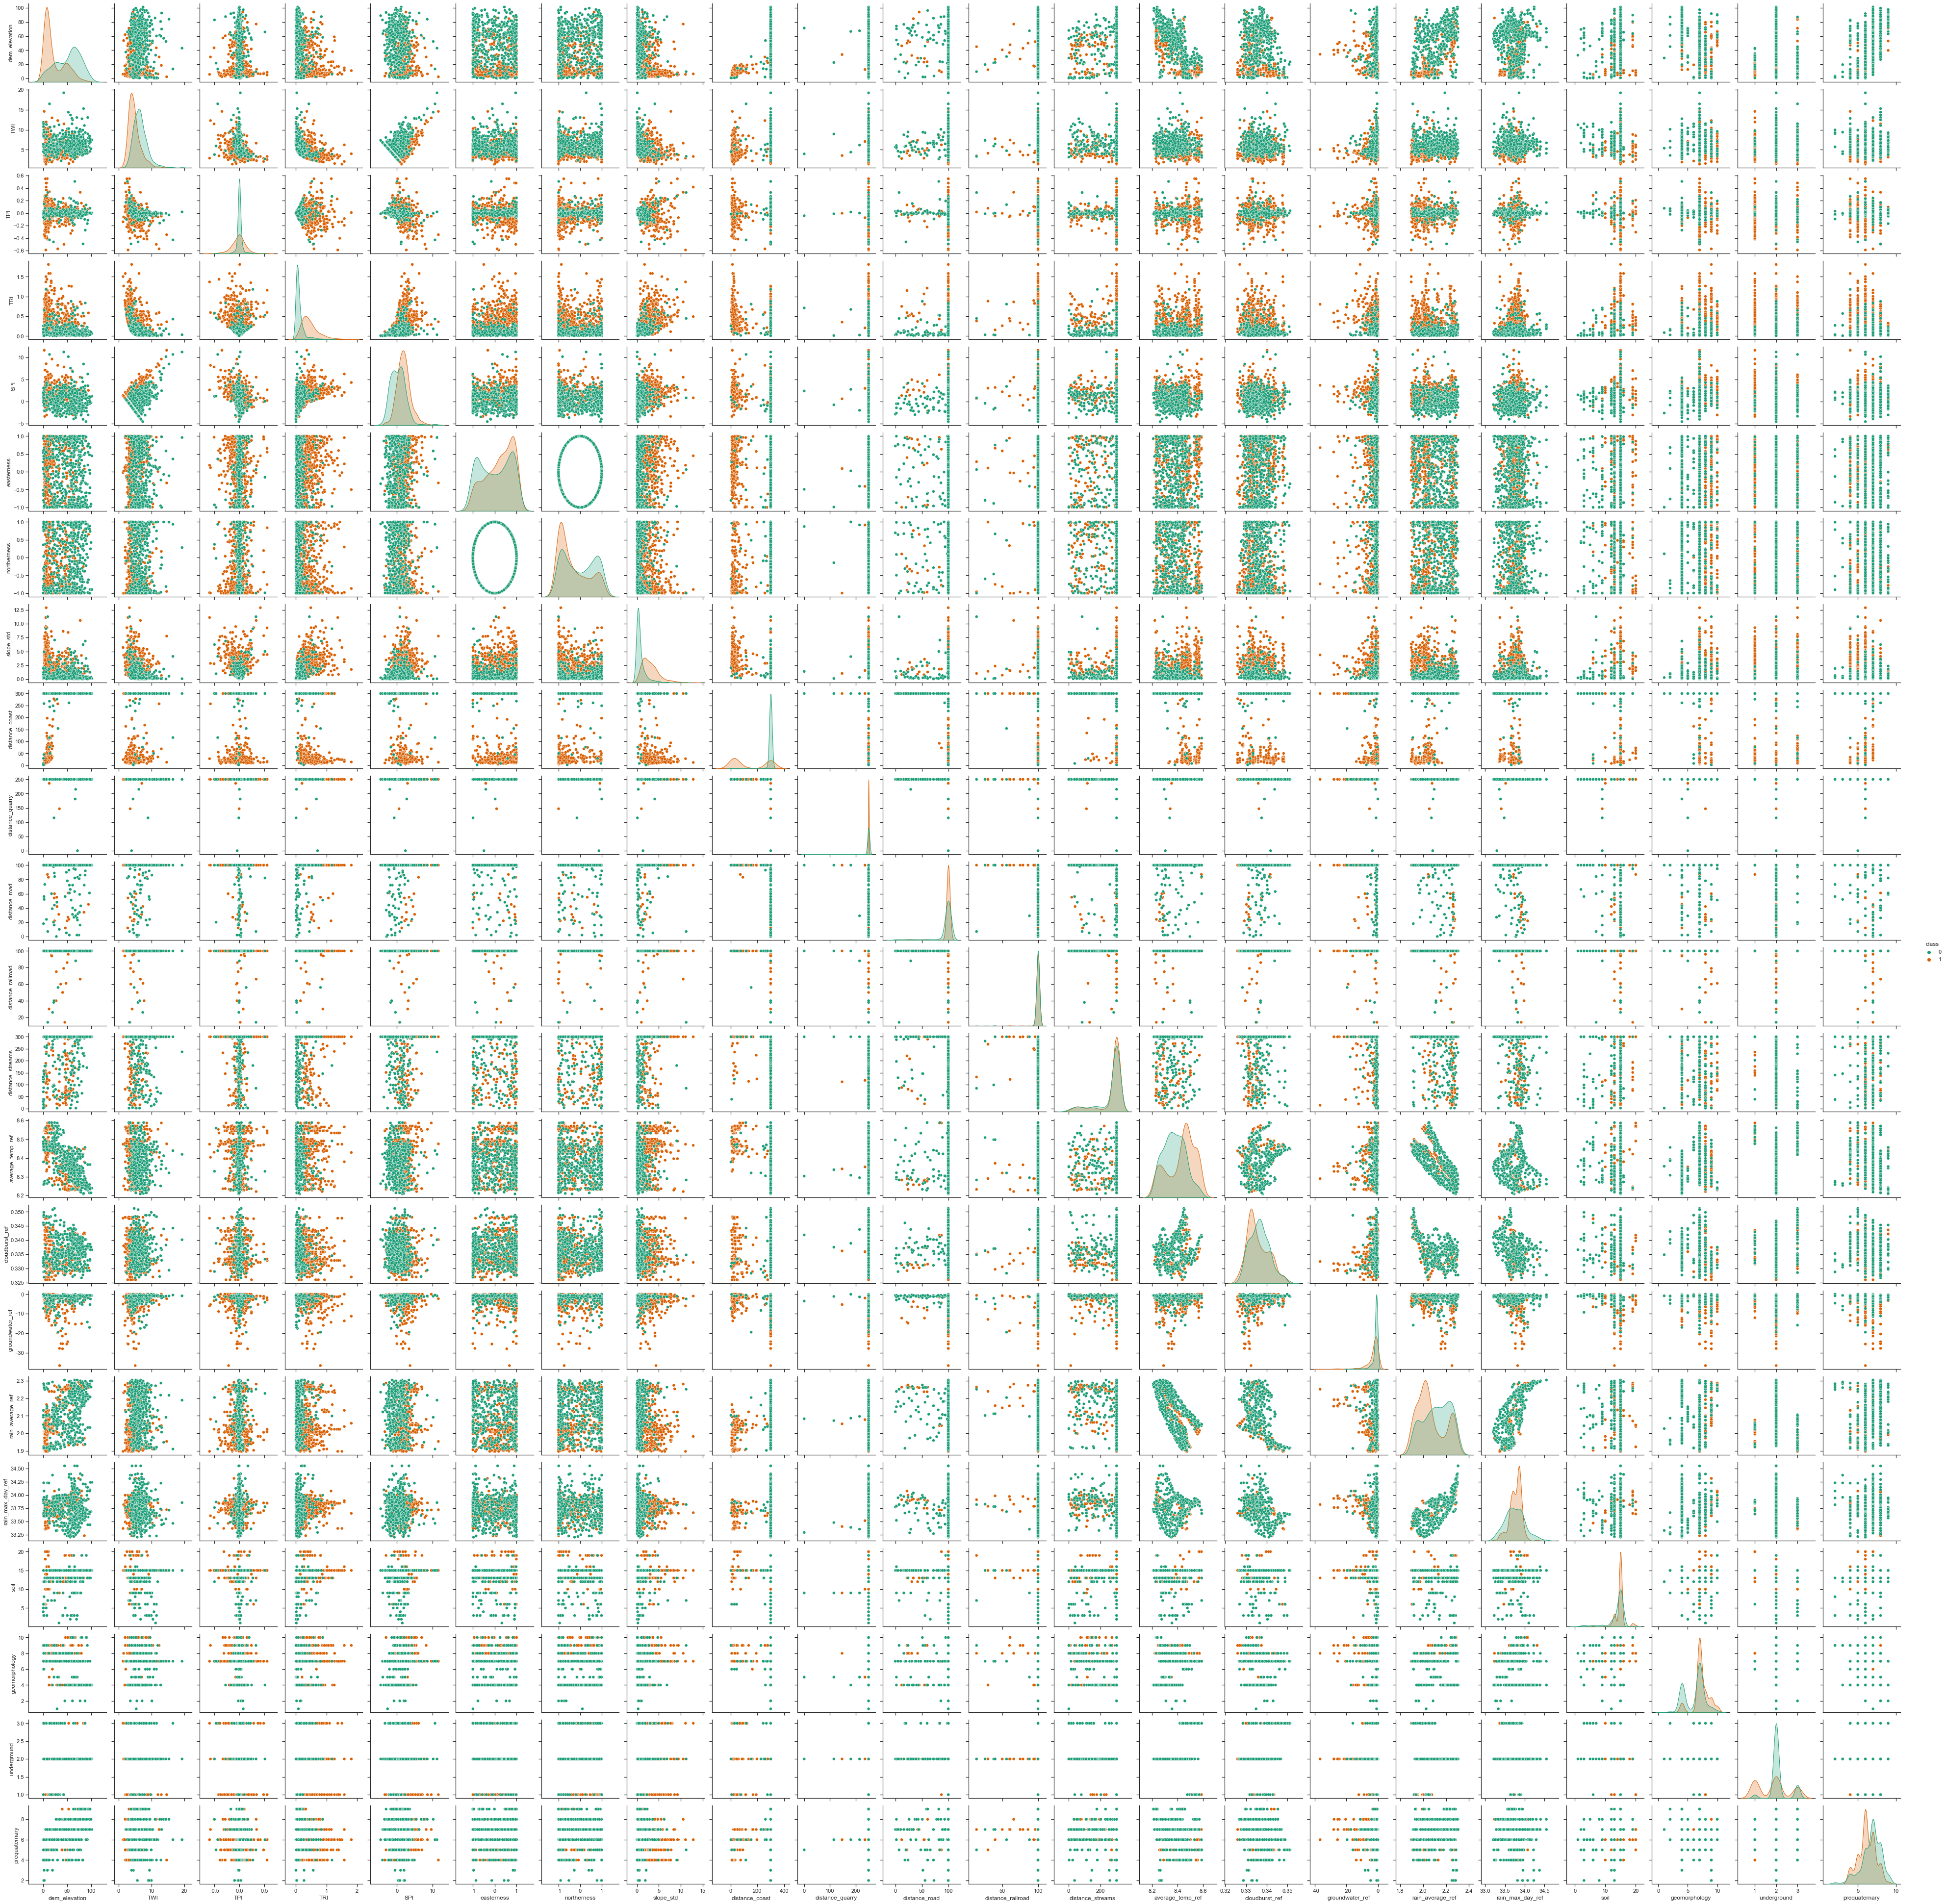

In [18]:
sn.set_theme(style="ticks")
sn.pairplot(data_selected, hue="class", palette='Dark2')

# Feature selection with the help of Random Forest

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [13]:
X = data_selected.iloc[:, 0:-1]

In [14]:
X[:3]

dem_elevation       TWI       TPI       TRI       SPI  easterness  \
0      15.706318  4.440497  0.126874  0.173688 -1.667908    0.196570   
1      15.232349  3.427183  0.048178  0.395249  0.731700    0.575379   
2      17.030214  3.888671 -0.000931  0.361396  1.081142    0.634705   

   northerness  slope_std  distance_coast  distance_quarry  ...  \
0    -0.980490   4.752529           115.0            250.0  ...   
1    -0.817887   3.343206            52.0            250.0  ...   
2    -0.772755   0.880331            80.0            250.0  ...   

   distance_streams  average_temp_ref  cloudburst_ref  groundwater_ref  \
0             300.0          8.462731        0.332363        -8.441628   
1             300.0          8.462731        0.332363        -1.949753   
2             300.0          8.462731        0.332363        -1.608266   

   rain_average_ref  rain_max_day_ref  soil  geomorphology  underground  \
0          2.006541         33.681606  15.0            7.0          3.0   
1          2.006541         33.681606  15.0            7.0          3.0   
2          2.006541         33.681606  15.0            7.0          3.0   

   prequaternary  
0            6.0  
1            6.0  
2            6.0  

[3 rows x 22 columns]

In [15]:
y = data_selected["class"]

In [16]:
y[:3]

0    1
1    1
2    1
Name: class, dtype: int64

Splitting our data into a training (70% of the data) and a testing set (30%), stratified after classes, so that we get the same amount of landslide and non-landslide samples in both sets


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [18]:
classifier = RandomForestClassifier(random_state=42)

In [19]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[123  13]
 [ 10 126]]


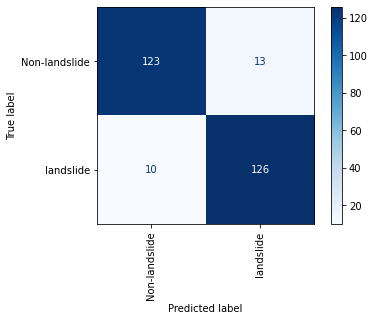

In [21]:
plot_confusion_matrix(classifier, X_test, y_test,
    display_labels=["Non-landslide", "landslide"],
    xticks_rotation="vertical",
    values_format="d", # No scientific notation.
    cmap="Blues" # The colour scheme
)  

Plotting the graph showing which features are important for the model

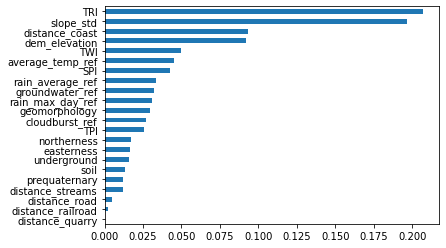

In [26]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nsmallest(25).plot(kind='barh')
plt.savefig('feature_importance.png', bbox_inches='tight', dpi=600)

Distance to railroad and to quarries have very little significance for the model, they can be dropped

The final variables for futher analysis

In [23]:
data_selected = data.drop(columns=['profile_curvature', 'slope_degrees', 'roughness', 'planform_curvature', 'average_wind_ref', 'rain_max_14day_ref', 'rain_5_year_ref', 'rain_50_year_ref', 'distance_road', 'distance_railroad', 'distance_quarry'])

In [24]:
data_selected.head()

dem_elevation       TWI       TPI       TRI       SPI  easterness  \
0      15.706318  4.440497  0.126874  0.173688 -1.667908    0.196570   
1      15.232349  3.427183  0.048178  0.395249  0.731700    0.575379   
2      17.030214  3.888671 -0.000931  0.361396  1.081142    0.634705   
3      15.583941  4.675134 -0.030232  0.183543  0.294679   -0.788825   
4      17.499943  8.491714  0.150789  0.410609  5.817518    0.268115   

   northerness  slope_std  distance_coast  distance_streams  average_temp_ref  \
0    -0.980490   4.752529           115.0             300.0          8.462731   
1    -0.817887   3.343206            52.0             300.0          8.462731   
2    -0.772755   0.880331            80.0             300.0          8.462731   
3    -0.614618   3.459515           120.0             300.0          8.455420   
4    -0.963387   2.392220            89.0             300.0          8.463237   

   cloudburst_ref  groundwater_ref  rain_average_ref  rain_max_day_ref  soil  \
0        0.332363        -8.441628          2.006541         33.681606  15.0   
1        0.332363        -1.949753          2.006541         33.681606  15.0   
2        0.332363        -1.608266          2.006541         33.681606  15.0   
3        0.329927        -7.234321          2.017731         33.668327  15.0   
4        0.328551        -0.485680          2.021318         33.706505  15.0   

   geomorphology  underground  prequaternary  class  
0            7.0          3.0            6.0      1  
1            7.0          3.0            6.0      1  
2            7.0          3.0            6.0      1  
3            7.0          3.0            6.0      1  
4            7.0          3.0            6.0      1

Saving the final file for machine learning as .csv file

In [25]:
data_selected.to_csv('data_final.csv', index = False)